**Analysing Price v/s Sales to Maximise Profit**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Data/data.csv')
df.head()

,date,id,sku_id,price,sku_name,gender,category,brand,collection,price_tier,style,cost,sales
0,24-05-2020,400,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,577.0
1,24-05-2020,800,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,545.0
2,24-05-2020,1200,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,565.0
3,24-05-2020,1600,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,536.0
4,24-05-2020,2000,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,568.0


In [ ]:
print(len(df),'\n')
df.info()

252000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        252000 non-null  object 
 1   id          252000 non-null  int64  
 2   sku_id      252000 non-null  int64  
 3   price       252000 non-null  float64
 4   sku_name    252000 non-null  object 
 5   gender      252000 non-null  object 
 6   category    252000 non-null  object 
 7   brand       252000 non-null  object 
 8   collection  252000 non-null  object 
 9   price_tier  252000 non-null  object 
 10  style       252000 non-null  object 
 11  cost        252000 non-null  float64
 12  sales       168000 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 25.0+ MB


In [ ]:
#found the number of null values
df.isnull().sum()

date              0
id                0
sku_id            0
price             0
sku_name          0
gender            0
category          0
brand             0
collection        0
price_tier        0
style             0
cost              0
sales         84000
dtype: int64

In [ ]:
#dropped null values
df.dropna(inplace=True)

In [ ]:
df[df['sku_id']==9]

,date,id,sku_id,price,sku_name,gender,category,brand,collection,price_tier,style,cost,sales
5670,24-05-2020,409,9,2.4,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,162.0
5671,24-05-2020,809,9,2.4,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,133.0
5672,24-05-2020,1209,9,2.4,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,155.0
5673,24-05-2020,1609,9,2.4,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,165.0
5674,24-05-2020,2009,9,2.4,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,20-06-2020,4409,9,2.5,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,116.0
6086,20-06-2020,4809,9,2.5,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,118.0
6087,20-06-2020,5209,9,2.5,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,124.0
6088,20-06-2020,5609,9,2.5,jeans_male_brand_1_AW_low_casual,male,jeans,brand_1,AW,low,casual,27.08,125.0


**Exploratory Data Analysis**

1. Number of unique items?

In [ ]:
print('Number of unique items in the data:',len(df['sku_id'].unique()))

Number of unique items in the data: 400


2. What is the mean and standard deviation for each item in both price and sold quantities?

In [ ]:
df['quantity']=round(df['sales']/df['price'],0)
dummy1=df[['price','quantity']].groupby(df['sku_id']).mean().rename(columns={'price':'mean_price','quantity':'mean_qunatity'})
dummy2=df[['price','quantity']].groupby(df['sku_id']).std().rename(columns={'price':'std_price','quantity':'std_quantity'})
calculated_df=pd.concat((dummy1,dummy2),axis=1)
calculated_df

,mean_price,mean_qunatity,std_price,std_quantity
sku_id,,,,
0,1.880952,444.121429,0.420597,404.765387
1,1.897619,196.419048,0.318099,151.587040
2,1.873810,361.366667,0.496439,317.559291
3,1.697619,811.723810,0.358291,475.721143
4,1.685714,479.690476,0.420219,281.414352
...,...,...,...,...
395,1.759524,524.257143,0.417079,458.004789
396,1.814286,533.785714,0.356345,462.793001
397,1.857143,361.921429,0.324522,290.364138


3. Change in sales with respective to sales?

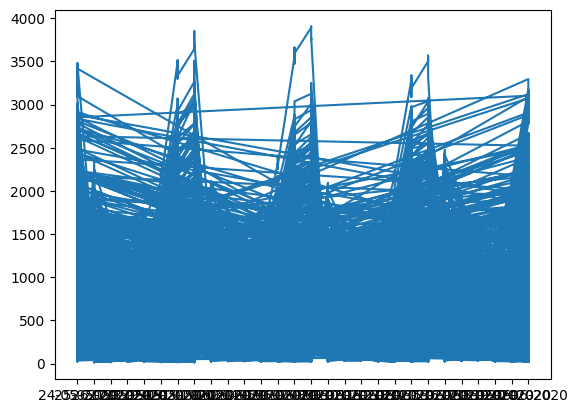

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['date'],df['sales'])

From the above graph we can see that the sales are changing based on the date

In [ ]:
#extracted month from datetime
df['date'] = pd.to_datetime(df['date'])
df['month']=df['date'].dt.month_name()
df['month'].value_counts()

<ipython-input-5-7b8fe42e1fdf>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


May          54000
June         54000
February      6000
January       6000
March         6000
April         6000
July          6000
August        6000
September     6000
October       6000
November      6000
December      6000
Name: month, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['month'],drop_first=False)

In [ ]:
df.columns

Index(['date', 'id', 'sku_id', 'price', 'sku_name', 'gender', 'category',
       'brand', 'collection', 'price_tier', 'style', 'cost', 'sales',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

**Linear Regression**

In [ ]:
#modelled linear regression on two independent variables price and month
from sklearn.model_selection import train_test_split
def sales_by_price(sku_id):
    df_new=df[df['sku_id']==sku_id]
    X_train,X_test,y_train,y_test=train_test_split(df_new.drop('sales', axis=1),df_new['sales'], test_size=0.25,random_state=1)
    X_train_Sm= sm.add_constant(X_train[['price', 'month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December']])
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary(),'\n')
    X_test_sm=sm.add_constant(X_test[['price', 'month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December']])
    print('\n',f'Mean square error for the sku_id {sku_id}:',np.mean((y_test - ls.predict(X_test_sm)) ** 2),'\n')


Summary results for the OLS Regression

In [ ]:
#sales v/s price for a given sku_id
input_sku_id=9
sales_by_price(input_sku_id)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     166.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          2.53e-125
Time:                        16:45:36   Log-Likelihood:                -1986.0
No. Observations:                 315   AIC:                             3998.
Df Residuals:                     302   BIC:                             4047.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2476.3188     91.199     

In [ ]:
#Finding elasticity coefficient
def elasticity(sku_id):
    df_new=df[df['sku_id']==sku_id]
    log_x= sm.add_constant(np.log(df_new['price'])) #logarithmic transformation of price
    log_y=np.log(df_new['sales']) #logarithmic transformation of sales
    ls=sm.OLS(log_y,log_x).fit()
    coefficient=ls.params[1]
    return round(coefficient,2)

In [ ]:
#elasticity coefficient for sku id 10
sku_id=10
print(f'elsticity coefficient for {sku_id} is',elasticity(sku_id))

elsticity coefficient for 10 is -3.67


In [ ]:
#appending all the elasticity coefficients into a list
a=[]
b=[]
for i in range(1,400,1):
  a.append(i)
  b.append(elasticity(i))

In [ ]:
#creating a DataFrame with sku_id, sku_name and elasticity coefficient.
elasticity_df=pd.DataFrame({'SKU_ID':np.arange(1,400,1),'Elasticity_coeff':b})
elasticity_df.set_index('SKU_ID',inplace=True)
df2=df[['sku_id','sku_name']].drop_duplicates(keep='first')
df3=pd.merge(df2,elasticity_df, right_on='SKU_ID',left_on='sku_id')
df3.set_index('sku_id', inplace=True)
print('Item with their Elasticity')
df3.head(10)

Item with their Elasticity


,sku_name,Elasticity_coeff
sku_id,,
1,boots_male_brand_2_AW_high_casual,-3.63
2,jacket_female_brand_3_P_middle_casual,-3.67
3,shoes_female_brand_4_AW_low_casual,-2.19
4,top_female_brand_1_P_middle_casual,-2.85
5,boots_male_brand_2_AW_low_casual,-3.23
6,t-shirt_male_brand_1_P_high_sport,-2.21
7,boots_male_brand_1_SS_middle_sport,-3.23
8,jeans_male_brand_4_P_low_casual,-4.11
9,jeans_male_brand_1_AW_low_casual,-3.82


In [ ]:
print('Least 5 price elastic Items')
df3.sort_values(by='Elasticity_coeff', ascending= False).head(5)

Least 5 price elastic Items


,sku_name,Elasticity_coeff
sku_id,,
99,trainers_male_brand_2_P_middle_casual,-0.55
181,jacket_male_brand_2_AW_high_sport,-0.68
195,t-shirt_male_brand_2_P_low_casual,-1.20
14,jeans_female_brand_2_SS_middle_casual,-1.27
235,jacket_male_brand_4_P_high_sport,-1.31


In [ ]:
print('Top 5 price elastic Items')
df3.sort_values(by='Elasticity_coeff', ascending= True).head(5)

Top 5 price elastic Items


,sku_name,Elasticity_coeff
sku_id,,
145,shoes_female_brand_4_SS_high_sport,-6.22
41,jeans_male_brand_3_AW_high_sport,-6.18
163,jacket_female_brand_4_SS_high_sport,-6.04
263,trainers_male_brand_4_P_low_sport,-6.03
327,jeans_female_brand_1_SS_low_sport,-5.96


**Machine Leaning Model**

Lets use 3 types of Machine Learning Models to predict sales based on price

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**Checking the Data Distribution**

In [ ]:
from scipy.stats import shapiro
a, b = shapiro(df['price'])
print("p-value for price", b)
if b < 0.05 :
  print("Price variable is not Normally distributed")
else :
    print("price variable is Normal distributed")

a, b = shapiro(df['sales'])
print("p-value for sales", b)
if b < 0.05 :
  print("Sales variable is not Normally distributed")
else :
    print("sales variable is Normal distributed")

p-value for price 0.0
Price variable is not Normally distributed
p-value for sales 1.0
sales variable is Normal distributed


(array([25110., 10725., 10965., 24975., 11265., 12735., 24210., 10815.,
        12915., 24285.]),
 array([1.2 , 1.33, 1.46, 1.59, 1.72, 1.85, 1.98, 2.11, 2.24, 2.37, 2.5 ]),
 <BarContainer object of 10 artists>)

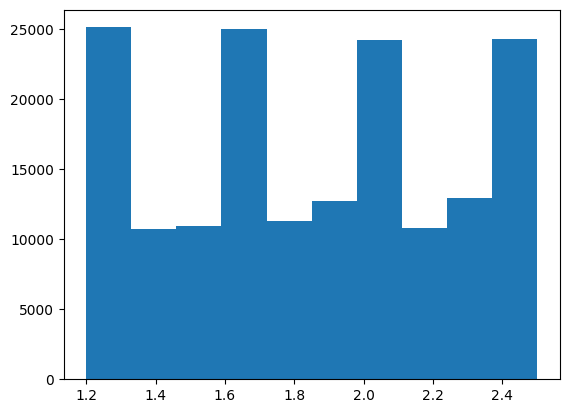

In [ ]:
plt.hist(df['price'])

#Prices are not normally distributed

(array([7.1386e+04, 4.2804e+04, 2.8127e+04, 1.4203e+04, 5.9900e+03,
        3.2400e+03, 1.4650e+03, 6.2500e+02, 1.1500e+02, 4.5000e+01]),
 array([  13. ,  402.2,  791.4, 1180.6, 1569.8, 1959. , 2348.2, 2737.4,
        3126.6, 3515.8, 3905. ]),
 <BarContainer object of 10 artists>)

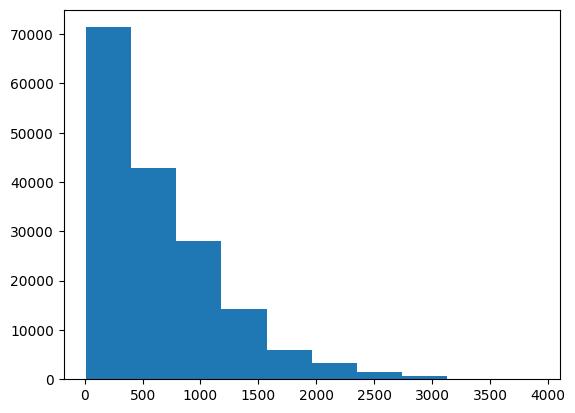

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['sales'])

#sales are normally distributed with right skewness

In [ ]:
#to remove the skewness apply log transformation to the sales variable

<Axes: >

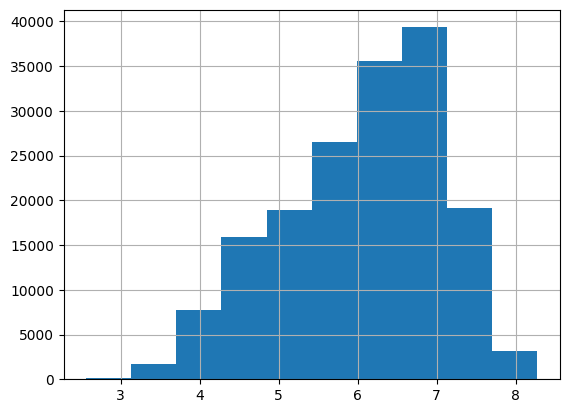

In [ ]:
df['lsales']=np.log(df['sales'])
df['lsales'].hist() #this histogram looks better than the prev.

**One Hot Encoding Categorical Variables**

In [ ]:
#variables I want consider for building the model are gender, price_tier, months, sku_id, price
df.isnull().sum()

date               0
id                 0
sku_id             0
price              0
sku_name           0
gender             0
category           0
brand              0
collection         0
price_tier         0
style              0
cost               0
sales              0
month_April        0
month_August       0
month_December     0
month_February     0
month_January      0
month_July         0
month_June         0
month_March        0
month_May          0
month_November     0
month_October      0
month_September    0
lsales             0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoded_data=encoder.fit_transform(df[['gender','price_tier']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender','price_tier']))
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded.drop(['gender','price_tier'],inplace=True,axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.isnull().sum()

date                 55860
id                   55860
sku_id               55860
price                55860
sku_name             55860
category             55860
brand                55860
collection           55860
style                55860
cost                 55860
sales                55860
month_April          55860
month_August         55860
month_December       55860
month_February       55860
month_January        55860
month_July           55860
month_June           55860
month_March          55860
month_May            55860
month_November       55860
month_October        55860
month_September      55860
lsales               55860
gender_female        55860
gender_male          55860
price_tier_high      55860
price_tier_low       55860
price_tier_middle    55860
dtype: int64

In [ ]:
#replaced the null values with 0
df_encoded.fillna(0,inplace=True)

In [ ]:
#splitting the data for training the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_encoded.drop(['sales','lsales'], axis=1),df_encoded['lsales'], test_size=0.25,random_state=1)

In [ ]:
#standardizing the price variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train[['price']])
X_train['new_price']=sc.transform(X_train[['price']])
X_test['new_price']=sc.transform(X_test[['price']])

In [ ]:
#preparing the train and test data for ML models
columns=encoder.get_feature_names_out(['gender','price_tier'])
X_train_n=pd.concat([X_train[['sku_id','new_price','month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December']],X_train[columns]],axis=1)
X_test_n=pd.concat([X_test[['sku_id','new_price','month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December']],X_test[columns]],axis=1)

In [ ]:
columns=encoder.get_feature_names_out(['gender','price_tier'])
columns

array(['gender_female', 'gender_male', 'price_tier_high',
       'price_tier_low', 'price_tier_middle'], dtype=object)

**Linear SVR with rbf kernal**

In [ ]:
model= SVR(kernel='linear')
X_train_n
model1=model.fit(X_train_n,y_train)
accuracy=model1.score(X_test_n,y_test)
print('accuracy of the SVR model',accuracy)

**Random Forest Regressor**

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model2=rf_regressor.fit(X_train_n,y_train)
accuracy=model2.score(X_test_n,y_test)
print('Accuracy of the Randomforest regressor model is:',accuracy)

Accuracy of the Randomforest regressor model is: 0.9838113716922723


**XGBoost Regressor**

In [ ]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
model3=xgb_regressor.fit(X_train_n,y_train)
accuracy=model3.score(X_test_n,y_test)
print('Accuracy of the XGB regressor model is:',accuracy)

Accuracy of the XGB regressor model is: 0.9743106338550672


In [ ]:
#From the above 3 ML models we can see that RF regressor has the best accuracy

**Neural Networks**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#building a neural network with 2 layers and each layer with 8 nodes
class nnmodel(nn.Module):
  def __init__(self,in_feat=18,n1=10,n2=8,out_feat=1):
     super().__init__()
     self.fp1=nn.Linear(in_feat,n1)
     self.fp2=nn.Linear(n1,n2)
     self.out=nn.Linear(n2,out_feat)
  def forward(self,x):
    x=F.relu(self.fp1(x))
    x=F.relu(self.fp2(x))
    x=self.out(x)
    return x

In [ ]:
torch.manual_seed(69)
model=nnmodel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

nnmodel(
  (fp1): Linear(in_features=18, out_features=10, bias=True)
  (fp2): Linear(in_features=10, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
#converting train and test data into 2D torch tensors
X_train_val=X_train_n.values
X_test_val=X_test_n.values
y_train_val=y_train.values
y_test_val=y_test.values
X_train_t=torch.FloatTensor(X_train_val)
X_test_t=torch.tensor(X_test_val,dtype=torch.float32)
y_train_t=torch.FloatTensor(y_train_val).reshape(-1,1)
y_test_t=torch.tensor(y_test_val,dtype=torch.float32).reshape(-1,1)
X_train_t=X_train_t.to(device)
X_test_t=X_test_t.to(device)
y_train_t=y_train_t.to(device)
y_test_t=y_test_t.to(device)

In [ ]:
#loss and optimizer
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from torchmetrics.functional.regression import r2_score

In [ ]:
epochs=300
loss_tot=[]
r2_square=[]
for i in range(epochs):
  model.forward(X_train_t) #training the model
  y_pred=model(X_train_t) #predicting
  mse=loss_fn(y_pred,y_train_t) #calculating MSE loss
  r2=r2_score(y_pred,y_train_t) #calculating rsquare
  loss_tot.append(mse.to('cpu').detach().numpy())
  r2_square.append(r2.to('cpu').detach().numpy())
  #print loss for every 10 epochs
  if i%10==0:
    print(f'for the epoch {i} loss is {mse} and R-squared is {r2}')

  optimizer.zero_grad()
  mse.backward()
  optimizer.step()

for the epoch 0 loss is 32.674224853515625 and R-squared is -3.295706272125244
for the epoch 10 loss is 9.532837867736816 and R-squared is -0.25328969955444336
for the epoch 20 loss is 6.317678928375244 and R-squared is 0.16940975189208984
for the epoch 30 loss is 4.866795539855957 and R-squared is 0.3601585626602173
for the epoch 40 loss is 3.096224308013916 and R-squared is 0.5929369330406189
for the epoch 50 loss is 1.5877890586853027 and R-squared is 0.7912521362304688
for the epoch 60 loss is 1.1415512561798096 and R-squared is 0.849919319152832
for the epoch 70 loss is 1.0182377099990845 and R-squared is 0.8661314845085144
for the epoch 80 loss is 0.861660897731781 and R-squared is 0.8867167830467224
for the epoch 90 loss is 0.7350977063179016 and R-squared is 0.90335613489151
for the epoch 100 loss is 0.6790335178375244 and R-squared is 0.9107269048690796
for the epoch 110 loss is 0.5857885479927063 and R-squared is 0.9229859113693237
for the epoch 120 loss is 0.5619035959243774

Text(0.5, 0, 'Epoch')

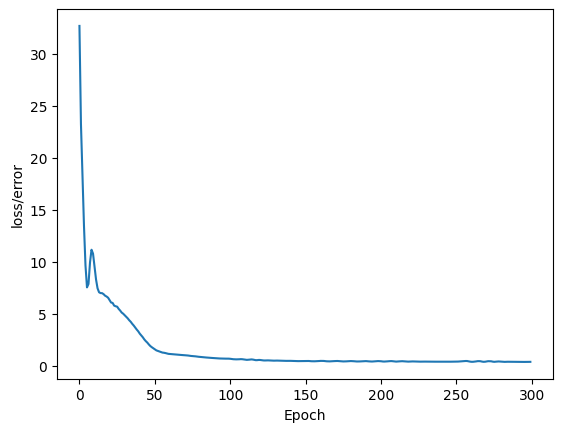

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), loss_tot)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
#evaluating the model on test set
model.eval()
with torch.no_grad():
  y_eval=model.forward(X_test_t)
  mse=loss_fn(y_eval,y_test_t)
  print('test loss:',mse)

test loss: tensor(0.3785, device='cuda:0')


In [ ]:
#saving the best model
import copy
best_weights = copy.deepcopy(model.state_dict())

In [ ]:
#loading the saved model with best weights as new_model
new_model=nnmodel()
new_model.load_state_dict(best_weights)
new_model.eval()

nnmodel(
  (fp1): Linear(in_features=18, out_features=10, bias=True)
  (fp2): Linear(in_features=10, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
#finding out the best price for sku_id=9, month=february, gender=male, price_tier=low
#create a data frame with 4 different price points for sku_id 9 first 3 in the month of march, next 3 in the month of april
p1=max(df[df['sku_id']==9]['price'])
p2=min(df[df['sku_id']==9]['price'])
p3=df[df['sku_id']==9]['price'].mean()
p4=1.7
p5=2.3
p6=0.5

price_df=pd.DataFrame({'sku_id':[9,9,9,9,9,9],'price':[p1,p2,p3,p4,p5,p6],'month_February':[0,0,0,0,0,0], 'month_March':[1,1,1,0,0,0],'month_April':[0,0,0,1,1,1],
       'month_May':[0,0,0,0,0,0],'month_June':[0,0,0,0,0,0],'month_July':[0,0,0,0,0,0], 'month_August':[0,0,0,0,0,0], 'month_September':[0,0,0,0,0,0],'month_October':[0,0,0,0,0,0],
       'month_November':[0,0,0,0,0,0], 'month_December':[0,0,0,0,0,0],'gender_female':[0,0,0,0,0,0],'gender_male':[1,1,1,0,0,0], 'price_tier_high':[0,0,0,0,0,0],
       'price_tier_low':[1,1,1,1,1,1], 'price_tier_middle':[0,0,0,0,0,0]})


price_df['new_price']=sc.transform(price_df[['price']])
price_df


,sku_id,price,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,gender_female,gender_male,price_tier_high,price_tier_low,price_tier_middle,new_price
0,9,2.500000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.267553
1,9,1.500000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.124332
2,9,2.096429,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.806182
3,9,1.700000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.352976
4,9,2.300000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1.038909
5,9,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.018888


In [ ]:
rf_sales_pred=model2.predict(price_df[['sku_id','new_price','month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December','gender_female', 'gender_male', 'price_tier_high',
       'price_tier_low', 'price_tier_middle']])
xgb_sales_pred=model3.predict(price_df[['sku_id','new_price','month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December','gender_female', 'gender_male', 'price_tier_high',
       'price_tier_low', 'price_tier_middle']])
price_df_values=price_df[['sku_id','new_price','month_February', 'month_March','month_April',
       'month_May','month_June','month_July', 'month_August', 'month_September','month_October',
       'month_November', 'month_December','gender_female', 'gender_male', 'price_tier_high',
       'price_tier_low', 'price_tier_middle']].values
nn_test=torch.tensor(price_df_values,dtype=torch.float32)
nn_test.to(device)
nn_sales_pred=new_model(nn_test)

In [ ]:
xgb_sales=np.exp(xgb_sales_pred).astype('int')
rf_sales=np.exp(rf_sales_pred).astype('int')
nn_sales=torch.exp(nn_sales_pred).detach().numpy().astype('int').reshape(-1)
sales_df=pd.DataFrame({'price':[p1,p2,p3,p4,p5,p6],'rf_pred':rf_sales,'xgb_pred':xgb_sales,'nn_pred':nn_sales})
sales_df

,price,rf_pred,xgb_pred,nn_pred
0,2.500000,94,109,100
1,1.500000,727,639,731
2,2.096429,154,327,239
3,1.700000,407,393,89
4,2.300000,96,158,24
5,0.500000,1,1,665


In [ ]:
#from this we can see that price of 1 is a outlier so the sales predictions are inaccuracte
#calculating profits:
sales_df['cost']=df[df['sku_id']==9]['cost'].mean()
sales_df['profit_rf']=(sales_df['price']-sales_df['cost']/100)*sales_df['rf_pred']

In [ ]:
sales_df[['price','rf_pred','cost','profit_rf']]

,price,rf_pred,cost,profit_rf
0,2.500000,94,27.08,209.5448
1,1.500000,727,27.08,893.6284
2,2.096429,154,27.08,281.1468
3,1.700000,407,27.08,581.6844
4,2.300000,96,27.08,194.8032
5,0.500000,1,27.08,0.2292
